In [1]:
import pandas as pd
import mplfinance as mpf
import matplotlib.dates as mdates
import numpy as np

# Read in daily data for NSE TCS

In [2]:
infile = 'data/t_data.csv'
df = pd.read_csv(infile, index_col=0, parse_dates=True)

In [3]:
# Formula For Simple Moving Average
# df['SMA21'] = df['Close'].rolling(window=21).mean()
# df['SMA100'] = df['Close'].rolling(window=100).mean()

In [4]:
#Function For Color Coding Golden Crossover
def color(goldencrossover):
    UP = []
    DOWN = []
    for i in range(len(goldencrossover)):
        if goldencrossover['SMA100'][i] < goldencrossover['SMA21'][i]:
            UP.append(int(goldencrossover['SMA100'][i]))
            DOWN.append(np.nan)
        elif goldencrossover['SMA100'][i] > goldencrossover['SMA21'][i]:
            DOWN.append(int(goldencrossover['SMA100'][i]))
            UP.append(np.nan)
        else:
            UP.append(np.nan)
            DOWN.append(np.nan)
    goldencrossover['up'] = UP
    goldencrossover['down'] = DOWN
    return goldencrossover

In [5]:
def golden_cal(df):
    goldenSignal = []
    deathSignal = []
    position = False
    for i in range(len(df)):
        if df['SMA21'][i] > df['SMA100'][i]:
            if position == False :
                goldenSignal.append((df['SMA100'][i]-df['SMA100'][i]*0.01))
                deathSignal.append(np.nan)
                position = True
            else:
                goldenSignal.append(np.nan)
                deathSignal.append(np.nan)
        elif df['SMA21'][i] < df['SMA100'][i]:
            if position == True:
                goldenSignal.append(np.nan)
                deathSignal.append((df['SMA100'][i]+df['SMA100'][i]*0.01))
                position = False
            else:
                goldenSignal.append(np.nan)
                deathSignal.append(np.nan)
        else:
            goldenSignal.append(np.nan)
            deathSignal.append(np.nan)
    df['GoldenCrossOver'] = goldenSignal
    df['DeathCrossOver'] = deathSignal

In [6]:
golden_cal(df)

In [7]:
#Fuction Color Applied And Df Generated 
goldencrossover = color(df)

In [8]:
# Data Extracted And New Variable Applied
up_sma100 = goldencrossover[['up']]
down_sma100 = goldencrossover[['down']]
up_sma21 = goldencrossover[['SMA21']]
dco = goldencrossover[['GoldenCrossOver']]
gco = goldencrossover[['DeathCrossOver']]

In [9]:
ic = [
    #Golden Crossover
    mpf.make_addplot(up_sma100,color = 'green',panel=0,),
    mpf.make_addplot(down_sma100,color = '#FF8849',panel=0,),
    mpf.make_addplot(up_sma21,color = '#0496ff',panel=0,linestyle='dashdot'),
    mpf.make_addplot(gco,type='scatter',markersize=200,marker='v',color='red',panel=0),
    mpf.make_addplot(dco,type='scatter',markersize=200,marker='^',color='green',panel=0),
]

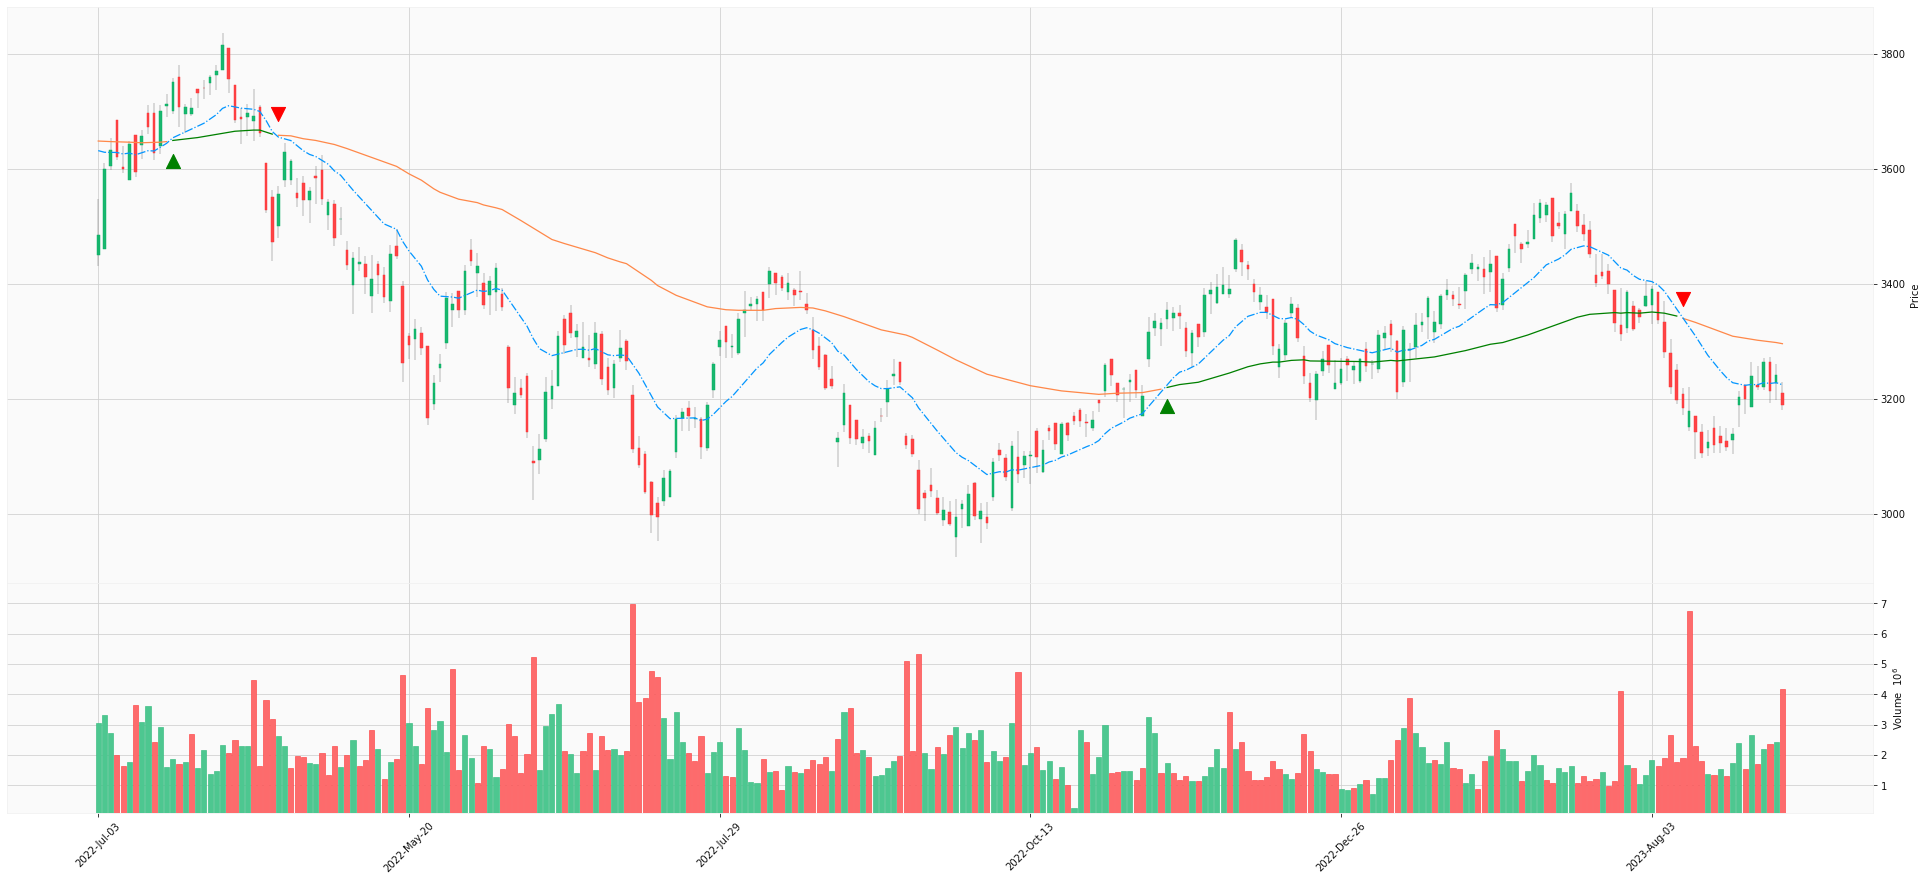

In [10]:
mpf.plot(
    df,
    volume=True,
    type="candle", 
    style="yahoo",
    addplot=ic,
    figscale=1.2,
    #fill_between = [fill_between_up,fill_between_down],
    figsize=(36,16,)
)